In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('./pima-indians-diabetes.data.csv')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

In [21]:
df=df.rename(columns={'6':'p1','148':'p2','72':'p3','35':'p4','0':'p5','33.6':'p6','0.627':'p7','50':'p8','1':'y'})
df

,p1,p2,p3,p4,p5,p6,p7,p8,y
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'y'], dtype='object')

In [23]:
df['y'].unique()

array([0, 1], dtype=int64)

In [24]:
df.shape

(767, 9)

In [26]:
df['y'].value_counts()

0    500
1    267
Name: y, dtype: int64

In [39]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='y', ylabel='count'>

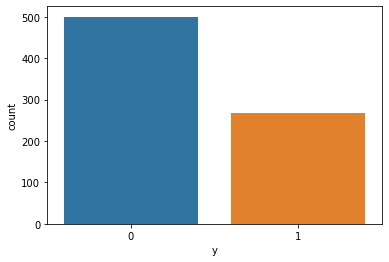

In [40]:
sns.countplot(df['y'])

## checking null values

In [41]:
df.isnull().sum()

p1    0
p2    0
p3    0
p4    0
p5    0
p6    0
p7    0
p8    0
y     0
dtype: int64

## checking whether columns are normally distributed or not

<AxesSubplot:xlabel='p1', ylabel='Density'>

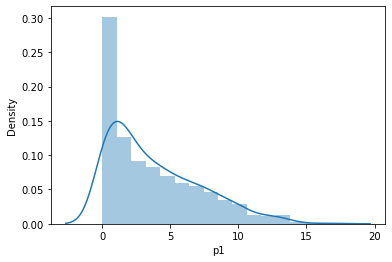

In [42]:
sns.distplot(df['p1'])

In [43]:
df.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'y'], dtype='object')

p1


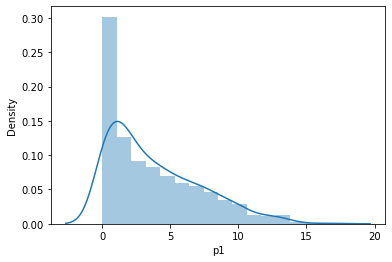

p2


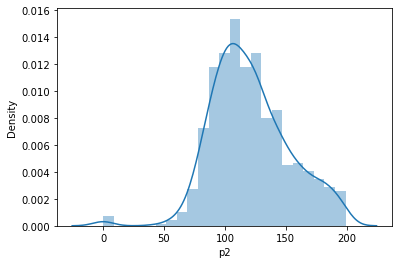

p3


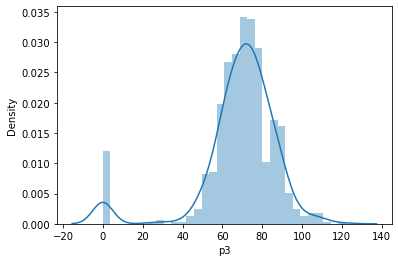

p4


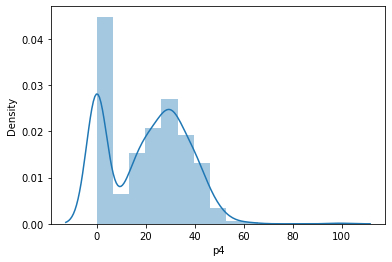

p5


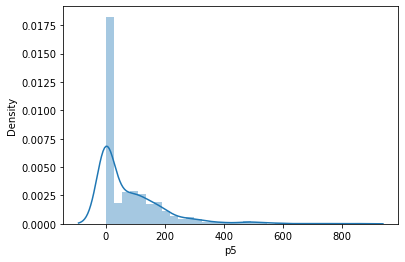

p6


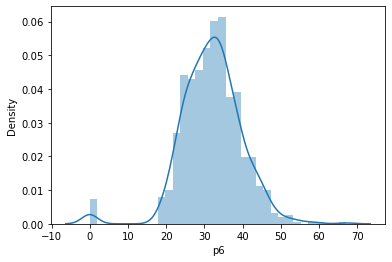

p7


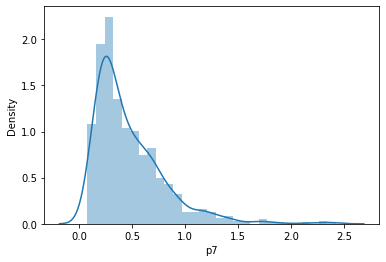

p8


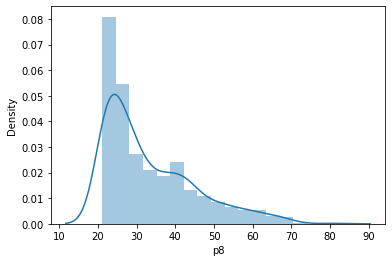

y


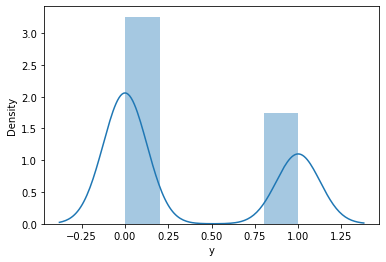

In [44]:
for i in df.columns:
    print(i)
    sns.distplot(df[i])
    plt.show()

In [ ]:
## checking outliers for each and every columns

p1


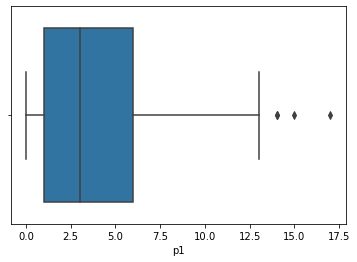

p2


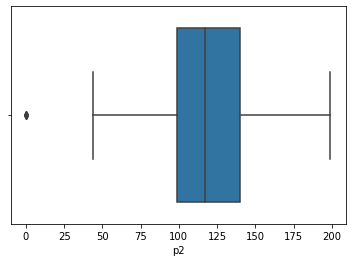

p3


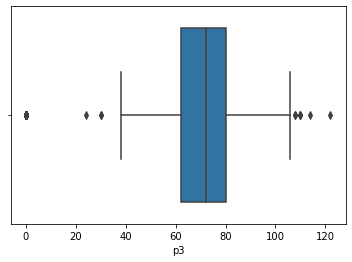

p4


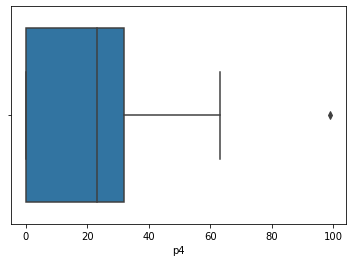

p5


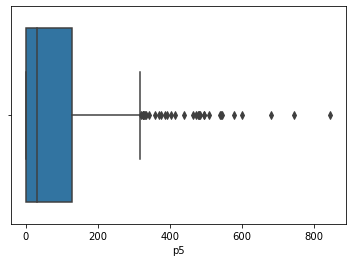

p6


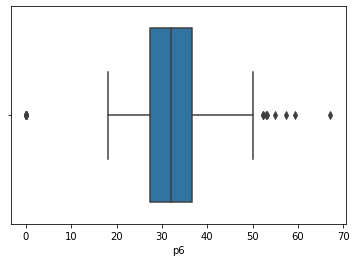

p7


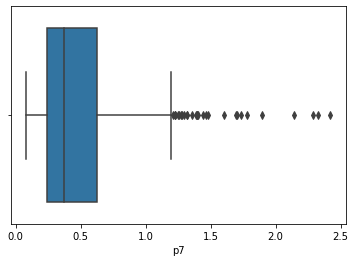

p8


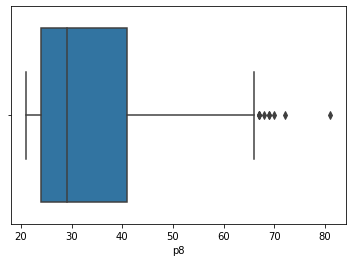

y


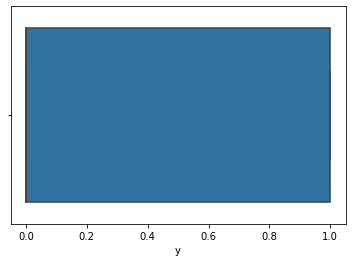

In [46]:
for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

## checking correlation with heat map

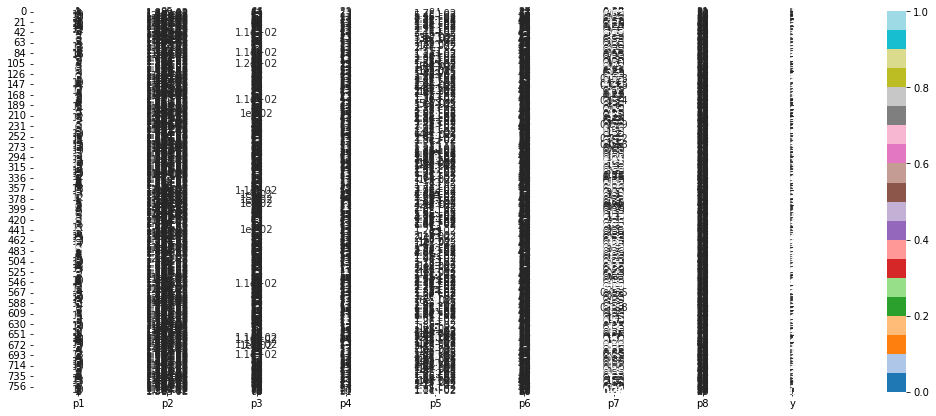

In [52]:

plt.figure(figsize=(18,7))
sns.heatmap(df,annot=True,linewidths = .5,cmap = 'tab20',vmin = 0 , vmax = 1)
plt.show()


## Spliting the data into train and test 

In [53]:
df

,p1,p2,p3,p4,p5,p6,p7,p8,y
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [54]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [55]:
import sklearn 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
dec=DecisionTreeClassifier(criterion='entropy')

In [61]:
reg=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [62]:
reg.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## checking reports with training data

In [63]:
y_train_pred=reg.predict(x_train)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [66]:
confusion_matrix(y_train,y_train_pred)

array([[330,   1],
       [  7, 175]], dtype=int64)

In [67]:
accuracy_score(y_train,y_train_pred)

0.9844054580896686

In [68]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       331
           1       0.99      0.96      0.98       182

    accuracy                           0.98       513
   macro avg       0.99      0.98      0.98       513
weighted avg       0.98      0.98      0.98       513



## checking test values

In [70]:
y_test_pred=reg.predict(x_test)

In [71]:
confusion_matrix(y_test,y_test_pred)

array([[142,  27],
       [ 31,  54]], dtype=int64)

In [72]:
accuracy_score(y_test,y_test_pred)

0.7716535433070866

In [73]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       169
           1       0.67      0.64      0.65        85

    accuracy                           0.77       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254

